In [2]:
import pandas as pd
import sweetviz as sv
import matplotlib
import plotly.express as px

In [3]:
patients = pd.read_csv(r"C:\Users\Steven\Downloads\patients.csv")
shipments = pd.read_csv(r"C:\Users\Steven\Downloads\shipments.csv")

In [4]:
patients.shape

(467179, 2)

In [5]:
patients.head()

,patient_id,state
0,755d138e0c7a0590f1caa8227c4858ba,CT
1,4b5061782c888086448eb8d83cfb6dcb,CA
2,883be102b492ca01a202bb94b66ef5ad,NY
3,177ac18d28a7b507a6d3394074db3f62,AL
4,1c322fdbba33b8b58ecd6a2a82718d0e,CA


In [6]:
shipments.shape

(3131174, 9)

In [7]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467179 entries, 0 to 467178
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   patient_id  467179 non-null  object
 1   state       467179 non-null  object
dtypes: object(2)
memory usage: 7.1+ MB


In [8]:
shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3131174 entries, 0 to 3131173
Data columns (total 9 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ship_id                     object 
 1   patient_id                  object 
 2   brand                       object 
 3   ship_date                   object 
 4   days_supply                 float64
 5   hcp_id                      object 
 6   primary_payer_type          object 
 7   patient_out_of_pocket_cost  float64
 8   specialty_pharmacy          object 
dtypes: float64(2), object(7)
memory usage: 215.0+ MB


In [9]:
shipments.head(10)

,ship_id,patient_id,brand,ship_date,days_supply,hcp_id,primary_payer_type,patient_out_of_pocket_cost,specialty_pharmacy
0,46d26cd662f14dab1d7bfcb865050cae,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-04-04,28.0,754ed78b7f4cb05a5566c112febf43a4,NaN,99.0,SP-2
1,50119a4fca71bf323686d84a5800c05a,755d138e0c7a0590f1caa8227c4858ba,Brand_B,2020-05-06,28.0,bd8c6726f317c3de05637152285f6b84,NaN,99.0,SP-5
2,a7a1e9461f5c79624dbcfcf2f2865e63,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-06-07,28.0,a8e9cfbfa94b93e75b4cada854b217b8,NaN,46.0,SP-3
3,514a7ca1b06ca8c8bf2b008175b218d3,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-06-11,28.0,aeed9a26af88cee19143f884a94028c2,NaN,46.0,SP-3
4,5bda856973eb75dfb30037ee67f8536a,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-07-16,28.0,64e7cb8d49236e2bec75e2e93a420225,NaN,46.0,SP-4
5,d25759cbcf8b382696c0cb995a6c8464,755d138e0c7a0590f1caa8227c4858ba,Brand_B,2020-08-12,28.0,b0b86d786679f3cb96bc784590161bd0,NaN,46.0,SP-5
6,51f02d8ef92f1de1e370c1ae82ca3412,4b5061782c888086448eb8d83cfb6dcb,Brand_A,2020-03-14,28.0,d7b9951293b7eae28bba33cf983aa935,COMMERCIAL,5.0,SP-5
7,4a8309b33fa2b93cf59df712b116d340,4b5061782c888086448eb8d83cfb6dcb,Brand_B,2020-03-14,28.0,5ef188473730e27e3fce8f39e89949c1,COMMERCIAL,5.0,SP-5
8,dd5deb660cfed2e03e18d2ec630448b0,883be102b492ca01a202bb94b66ef5ad,Brand_A,2020-12-25,28.0,a1f817e9b84cb3c545f99495e10a1491,UNKNOWN,0.0,SP-4
9,5f901d46daa906f43c92e85abd547516,883be102b492ca01a202bb94b66ef5ad,Brand_A,2021-01-23,28.0,956c360ee5ad04892061185a0ce177f3,UNKNOWN,5.0,SP-5


In [10]:
# get the dataframe between the two specified dates for Brand A
ship_a = shipments[(shipments['ship_date'] >= '2020-02-01') & (shipments['ship_date'] < '2021-02-01') & (shipments['brand'] == 'Brand_A')]

In [11]:
#ship_a.head(10)
ship_a.shape

(2152615, 9)

Get the number of unique patients that had at least one shipment between Feb 2020 and Jan 2021

In [12]:
print(ship_a['patient_id'].nunique())

443326


In [13]:
brand_a = shipments[shipments['brand'] == 'Brand_A']
brand_a.shape

(2152615, 9)

In [14]:
shipments['ship_date'].max()

'2021-01-31'

In [15]:
shipments['ship_date'].min()

'2020-02-16'

In [16]:
brand_a['ship_date'] = pd.to_datetime(brand_a['ship_date'])
brand_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152615 entries, 0 to 3131173
Data columns (total 9 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   ship_id                     object        
 1   patient_id                  object        
 2   brand                       object        
 3   ship_date                   datetime64[ns]
 4   days_supply                 float64       
 5   hcp_id                      object        
 6   primary_payer_type          object        
 7   patient_out_of_pocket_cost  float64       
 8   specialty_pharmacy          object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 164.2+ MB


<ipython-input-16-2268f6600add>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_a['ship_date'] = pd.to_datetime(brand_a['ship_date'])


In [17]:
brand_a.head(10)

,ship_id,patient_id,brand,ship_date,days_supply,hcp_id,primary_payer_type,patient_out_of_pocket_cost,specialty_pharmacy
0,46d26cd662f14dab1d7bfcb865050cae,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-04-04,28.0,754ed78b7f4cb05a5566c112febf43a4,NaN,99.0,SP-2
2,a7a1e9461f5c79624dbcfcf2f2865e63,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-06-07,28.0,a8e9cfbfa94b93e75b4cada854b217b8,NaN,46.0,SP-3
3,514a7ca1b06ca8c8bf2b008175b218d3,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-06-11,28.0,aeed9a26af88cee19143f884a94028c2,NaN,46.0,SP-3
4,5bda856973eb75dfb30037ee67f8536a,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-07-16,28.0,64e7cb8d49236e2bec75e2e93a420225,NaN,46.0,SP-4
6,51f02d8ef92f1de1e370c1ae82ca3412,4b5061782c888086448eb8d83cfb6dcb,Brand_A,2020-03-14,28.0,d7b9951293b7eae28bba33cf983aa935,COMMERCIAL,5.0,SP-5
8,dd5deb660cfed2e03e18d2ec630448b0,883be102b492ca01a202bb94b66ef5ad,Brand_A,2020-12-25,28.0,a1f817e9b84cb3c545f99495e10a1491,UNKNOWN,0.0,SP-4
9,5f901d46daa906f43c92e85abd547516,883be102b492ca01a202bb94b66ef5ad,Brand_A,2021-01-23,28.0,956c360ee5ad04892061185a0ce177f3,UNKNOWN,5.0,SP-5
10,6a2073d9ef02e85fcc7108fc21769afc,177ac18d28a7b507a6d3394074db3f62,Brand_A,2020-04-08,28.0,94e1440ac728eaf8d36062969f6beef1,COMMERCIAL,0.0,SP-5
12,56e8483fbf863174bb5ef797ef53c4b0,177ac18d28a7b507a6d3394074db3f62,Brand_A,2020-05-02,28.0,6a4fb51e1d076492387de6cc9dd821a9,COMMERCIAL,0.0,SP-5
13,1e01987a325fad7f0624f034049544a8,177ac18d28a7b507a6d3394074db3f62,Brand_A,2020-09-02,28.0,94c23b190936e4711c1eabe06c34fa73,COMMERCIAL,0.0,SP-2


In [18]:
brand_a_mom = brand_a.groupby(brand_a['ship_date'].dt.to_period('m'))[['days_supply']].sum()

In [19]:
print(brand_a_mom)

           days_supply
ship_date             
2020-02       983391.0
2020-03      5125699.0
2020-04      4192294.0
2020-05      3745646.0
2020-06      4017757.0
2020-07      4185949.0
2020-08      6502078.0
2020-09      6144951.0
2020-10      6270142.0
2020-11      6120114.0
2020-12      8583043.0
2021-01      4812882.0


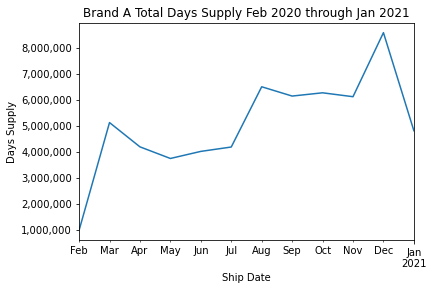

In [20]:
ax = brand_a_mom.plot(logy=False, use_index=True)
#vals = ax.get_yticks()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Brand A Total Days Supply Feb 2020 through Jan 2021')
ax.set_xlabel('Ship Date')
ax.set_ylabel('Days Supply')
ax.get_legend().remove()

In [21]:
# get total days supply for brand A
brand_a['days_supply'].sum()

60683946.0

In [22]:
brand_a_merged = pd.merge(brand_a, patients, how='inner', on='patient_id')
brand_a_merged.shape

(2152615, 10)

In [23]:
brand_a_merged.head(10)

,ship_id,patient_id,brand,ship_date,days_supply,hcp_id,primary_payer_type,patient_out_of_pocket_cost,specialty_pharmacy,state
0,46d26cd662f14dab1d7bfcb865050cae,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-04-04,28.0,754ed78b7f4cb05a5566c112febf43a4,NaN,99.0,SP-2,CT
1,a7a1e9461f5c79624dbcfcf2f2865e63,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-06-07,28.0,a8e9cfbfa94b93e75b4cada854b217b8,NaN,46.0,SP-3,CT
2,514a7ca1b06ca8c8bf2b008175b218d3,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-06-11,28.0,aeed9a26af88cee19143f884a94028c2,NaN,46.0,SP-3,CT
3,5bda856973eb75dfb30037ee67f8536a,755d138e0c7a0590f1caa8227c4858ba,Brand_A,2020-07-16,28.0,64e7cb8d49236e2bec75e2e93a420225,NaN,46.0,SP-4,CT
4,51f02d8ef92f1de1e370c1ae82ca3412,4b5061782c888086448eb8d83cfb6dcb,Brand_A,2020-03-14,28.0,d7b9951293b7eae28bba33cf983aa935,COMMERCIAL,5.0,SP-5,CA
5,dd5deb660cfed2e03e18d2ec630448b0,883be102b492ca01a202bb94b66ef5ad,Brand_A,2020-12-25,28.0,a1f817e9b84cb3c545f99495e10a1491,UNKNOWN,0.0,SP-4,NY
6,5f901d46daa906f43c92e85abd547516,883be102b492ca01a202bb94b66ef5ad,Brand_A,2021-01-23,28.0,956c360ee5ad04892061185a0ce177f3,UNKNOWN,5.0,SP-5,NY
7,6a2073d9ef02e85fcc7108fc21769afc,177ac18d28a7b507a6d3394074db3f62,Brand_A,2020-04-08,28.0,94e1440ac728eaf8d36062969f6beef1,COMMERCIAL,0.0,SP-5,AL
8,56e8483fbf863174bb5ef797ef53c4b0,177ac18d28a7b507a6d3394074db3f62,Brand_A,2020-05-02,28.0,6a4fb51e1d076492387de6cc9dd821a9,COMMERCIAL,0.0,SP-5,AL
9,1e01987a325fad7f0624f034049544a8,177ac18d28a7b507a6d3394074db3f62,Brand_A,2020-09-02,28.0,94c23b190936e4711c1eabe06c34fa73,COMMERCIAL,0.0,SP-2,AL


In [24]:
states_a = brand_a_merged.groupby('state')['days_supply'].sum()

In [25]:
states_a = states_a.reset_index().sort_values(by=['days_supply'], ascending=False)
states_a

,state,days_supply
33,NY,8520801.0
8,FL,8428905.0
4,CA,7680694.0
36,OR,792058.0
26,NC,785200.0
27,ND,785113.0
32,NV,783281.0
34,OH,782693.0
1,AL,782408.0
30,NJ,782403.0


In [26]:
fig = px.funnel(states_a, y='state', x='days_supply')
fig.write_image('states.png')

In [27]:
# calculate the absolute volume of the top 3 states
top_3 = states_a[:3]['days_supply'].sum()
top_3

24630400.0

In [28]:
# calculate the percent contribution of the top 3 states
top_3_contrib = top_3/brand_a['days_supply'].sum()
top_3_contrib

0.40587999995913254

In [29]:
brand_a['patient_out_of_pocket_cost'].describe()

count    2.152615e+06
mean     7.874763e+01
std      4.214974e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+00
max      1.699700e+04
Name: patient_out_of_pocket_cost, dtype: float64

array([[<AxesSubplot:title={'center':'patient_out_of_pocket_cost'}>]],
      dtype=object)

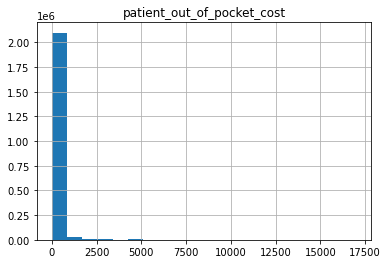

In [30]:
brand_a.hist(column='patient_out_of_pocket_cost', bins=20)

In [31]:
brand_a['patient_out_of_pocket_cost'].mean()

78.74763206611493

In [32]:
brand_a['patient_out_of_pocket_cost'].value_counts()

0.0       1230564
4.0        242965
5.0        172096
3.0         44391
8.0         26734
           ...   
4304.0          1
6255.0          1
6258.0          1
5162.0          1
4974.0          1
Name: patient_out_of_pocket_cost, Length: 6081, dtype: int64

In [68]:
len(brand_a['patient_out_of_pocket_cost'])

2152615

In [69]:
1230564/2152615

0.5716600506825419

In [33]:
brand_a['hcp_id'].value_counts()

0d9c6b4e0883f0cf9e1589d5a01a182e    21384
6f1e3231ee288e885583c07b2776696a    17724
39a872ec822b9f5b7ed060b04e0492b5    16140
80618ddfe60dfb322ba8582b4c4abffd    15749
dd862250d1d56a7a0cf0a9c0b1f2eddc    14115
                                    ...  
7af25d7f0d0bff132786d7c6ae237980       14
25a6d371db333ba4da0e84dd6c3775f7       14
454c286ae2a02836edf6c7904ea2c193       13
7aed12ec558bd5685b335f44852667df       13
8c7be19336a93b17328e7dfeef63b3bc       11
Name: hcp_id, Length: 4669, dtype: int64

In [34]:
hcp_vols = brand_a.groupby('hcp_id')['days_supply'].sum().reset_index().sort_values(by='days_supply', ascending=False)
hcp_vols

,hcp_id,days_supply
255,0d9c6b4e0883f0cf9e1589d5a01a182e,602483.0
2015,6f1e3231ee288e885583c07b2776696a,499579.0
1036,39a872ec822b9f5b7ed060b04e0492b5,455313.0
2341,80618ddfe60dfb322ba8582b4c4abffd,442963.0
4034,dd862250d1d56a7a0cf0a9c0b1f2eddc,397428.0
...,...,...
450,18681cc424b8d2eccea75d9afb421c78,392.0
2236,7af25d7f0d0bff132786d7c6ae237980,392.0
2233,7aed12ec558bd5685b335f44852667df,366.0
1254,454c286ae2a02836edf6c7904ea2c193,364.0


array([[<AxesSubplot:title={'center':'days_supply'}>]], dtype=object)

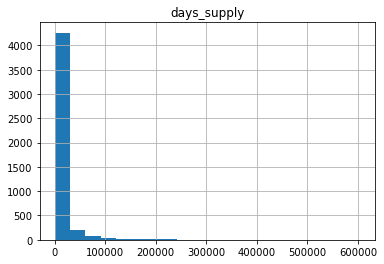

In [35]:
hcp_vols.hist(column='days_supply', bins=20)

In [36]:
hcp_vols.describe()

,days_supply
count,4669.000000
mean,12997.204112
std,31349.624243
min,308.000000
25%,2212.000000
50%,4598.000000
75%,10092.000000
max,602483.000000


In [37]:
hcp_volperc = hcp_vols
hcp_volperc['percent_contribution'] =(hcp_vols['days_supply']/hcp_vols['days_supply'].sum()) * 100
hcp_volperc['cum_percent'] = hcp_volperc['percent_contribution'].cumsum()
hcp_volperc.head(20)

,hcp_id,days_supply,percent_contribution,cum_percent
255,0d9c6b4e0883f0cf9e1589d5a01a182e,602483.0,0.992821,0.992821
2015,6f1e3231ee288e885583c07b2776696a,499579.0,0.823247,1.816068
1036,39a872ec822b9f5b7ed060b04e0492b5,455313.0,0.750302,2.566371
2341,80618ddfe60dfb322ba8582b4c4abffd,442963.0,0.729951,3.296322
4034,dd862250d1d56a7a0cf0a9c0b1f2eddc,397428.0,0.654915,3.951236
1356,4a4dd9ed73620d944b4ad0f6a9c704ca,395879.0,0.652362,4.603598
425,17509ea51926ba66dc60a9080117dc31,321256.0,0.529392,5.132990
3161,aeb12edd1aa6b4ed46edd07f016e1311,305098.0,0.502766,5.635756
3078,aab5aeb364c7afeac8d4583870faf753,291851.0,0.480936,6.116692
1867,671386820c0b11308d5b94537c40d740,280740.0,0.462626,6.579318


In [38]:
hcp_volperc.tail(20)

,hcp_id,days_supply,percent_contribution,cum_percent
1556,55636bc74e5290544d7cbc00553b6ffe,448.0,0.000738,99.987466
1852,6660dc21d365b57d18909b0c007c693c,440.0,0.000725,99.988191
3406,bbd6ed071a30ebaeaf39a316cb5e7973,440.0,0.000725,99.988916
2667,9413bd54d8f0bba15ed3aa23b964a131,432.0,0.000712,99.989628
2033,7006da3be959245f9ce657f8760f8c71,420.0,0.000692,99.990320
3063,a9bb61d22fa4aec308696206d67bc775,420.0,0.000692,99.991012
1301,46f0b4fe728b3aca65cb684e78ebbfa6,420.0,0.000692,99.991705
3991,db04cd456e26c61a6fa741b991052a47,420.0,0.000692,99.992397
127,076801dc947c6bbd0c6db73afc8d9c99,420.0,0.000692,99.993089
1232,438939353de1f0ace474c0647389c9b8,412.0,0.000679,99.993768


### Create time series forecast using Prophet

In [39]:
from fbprophet import Prophet

In [42]:
model_data = brand_a_mom.reset_index()
model_data

,index,ship_date,days_supply
0,0,2020-02,983391.0
1,1,2020-03,5125699.0
2,2,2020-04,4192294.0
3,3,2020-05,3745646.0
4,4,2020-06,4017757.0
5,5,2020-07,4185949.0
6,6,2020-08,6502078.0
7,7,2020-09,6144951.0
8,8,2020-10,6270142.0
9,9,2020-11,6120114.0


In [43]:
model_data = model_data[['ship_date', 'days_supply']]
model_data.head()

,ship_date,days_supply
0,2020-02,983391.0
1,2020-03,5125699.0
2,2020-04,4192294.0
3,2020-05,3745646.0
4,2020-06,4017757.0


In [44]:
model_data = model_data.rename(columns={'ship_date':'ds', 'days_supply':'y'})

In [45]:
model_data.head()

,ds,y
0,2020-02,983391.0
1,2020-03,5125699.0
2,2020-04,4192294.0
3,2020-05,3745646.0
4,2020-06,4017757.0


In [56]:
model_data['ds'] = pd.to_datetime(model_data['ds'].astype(str))
model_data.head()

,ds,y
0,2020-02-01,983391.0
1,2020-03-01,5125699.0
2,2020-04-01,4192294.0
3,2020-05-01,3745646.0
4,2020-06-01,4017757.0


In [57]:
m = Prophet()
m.fit(model_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


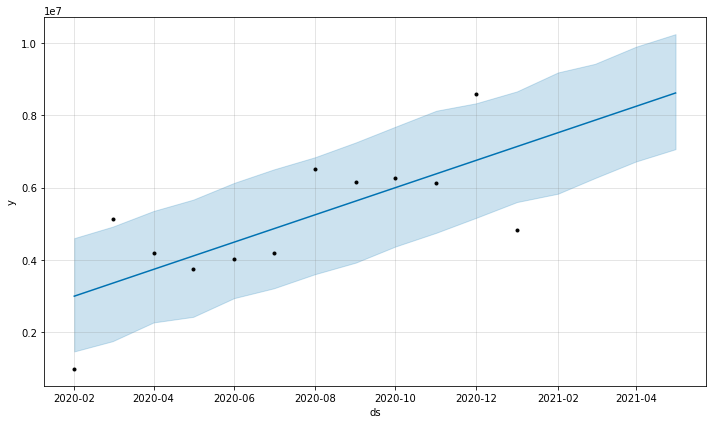

In [58]:
future = m.make_future_dataframe(periods=4, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

In [63]:
forecast.tail(6)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10,2020-12-01,6.749432e+06,5.161221e+06,8.327863e+06,6.749432e+06,6.749432e+06,0.0,0.0,0.0,0.0,0.0,0.0,6.749432e+06
11,2021-01-01,7.132020e+06,5.598851e+06,8.657348e+06,7.132020e+06,7.132020e+06,0.0,0.0,0.0,0.0,0.0,0.0,7.132020e+06
12,2021-02-01,7.514609e+06,5.828959e+06,9.180515e+06,7.514609e+06,7.514609e+06,0.0,0.0,0.0,0.0,0.0,0.0,7.514609e+06
13,2021-03-01,7.860173e+06,6.261011e+06,9.417893e+06,7.860173e+06,7.860173e+06,0.0,0.0,0.0,0.0,0.0,0.0,7.860173e+06
14,2021-04-01,8.242762e+06,6.719409e+06,9.890546e+06,8.242762e+06,8.242762e+06,0.0,0.0,0.0,0.0,0.0,0.0,8.242762e+06
15,2021-05-01,8.613009e+06,7.060305e+06,1.023917e+07,8.613009e+06,8.613009e+06,0.0,0.0,0.0,0.0,0.0,0.0,8.613009e+06


In [59]:
m2 = Prophet()
a_model = brand_a[['ship_date', 'days_supply']]
a_model = a_model.rename(columns={'ship_date':'ds', 'days_supply':'y'})
a_model.head()

,ds,y
0,2020-04-04,28.0
2,2020-06-07,28.0
3,2020-06-11,28.0
4,2020-07-16,28.0
6,2020-03-14,28.0


In [60]:
m2.fit(a_model)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


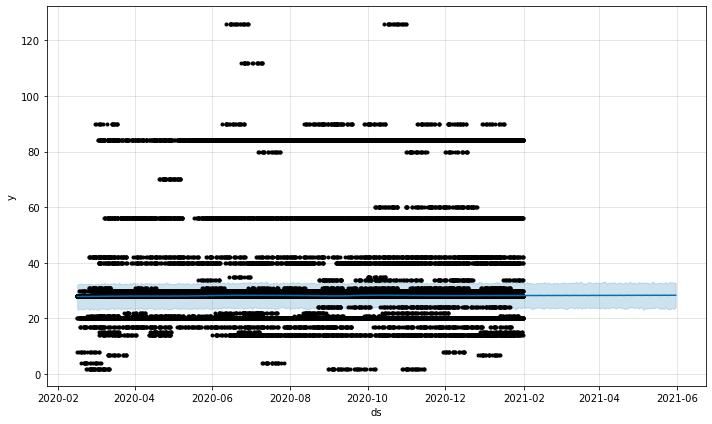

In [61]:
future2 = m2.make_future_dataframe(periods=120)
forecast2 = m2.predict(future2)
fig2 = m2.plot(forecast2)

In [64]:
forecast2.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
461,2021-05-22,28.330260,23.416849,32.745800,27.474804,29.079417,-0.000902,-0.000902,-0.000902,-0.000902,-0.000902,-0.000902,0.0,0.0,0.0,28.329358
462,2021-05-23,28.331066,24.189475,33.121649,27.460430,29.088373,0.030159,0.030159,0.030159,0.030159,0.030159,0.030159,0.0,0.0,0.0,28.361225
463,2021-05-24,28.331871,23.605198,32.583157,27.450980,29.097805,-0.005230,-0.005230,-0.005230,-0.005230,-0.005230,-0.005230,0.0,0.0,0.0,28.326641
464,2021-05-25,28.332676,23.331380,32.759508,27.440457,29.105649,0.003085,0.003085,0.003085,0.003085,0.003085,0.003085,0.0,0.0,0.0,28.335761
465,2021-05-26,28.333482,23.321112,32.966620,27.430249,29.117036,-0.026448,-0.026448,-0.026448,-0.026448,-0.026448,-0.026448,0.0,0.0,0.0,28.307034
466,2021-05-27,28.334287,23.451363,33.079790,27.420040,29.130802,-0.011055,-0.011055,-0.011055,-0.011055,-0.011055,-0.011055,0.0,0.0,0.0,28.323232
467,2021-05-28,28.335093,23.876545,32.982059,27.405661,29.143944,0.010392,0.010392,0.010392,0.010392,0.010392,0.010392,0.0,0.0,0.0,28.345484
468,2021-05-29,28.335898,23.417990,33.016866,27.392032,29.154106,-0.000902,-0.000902,-0.000902,-0.000902,-0.000902,-0.000902,0.0,0.0,0.0,28.334996
469,2021-05-30,28.336703,23.624119,32.531175,27.378515,29.163012,0.030159,0.030159,0.030159,0.030159,0.030159,0.030159,0.0,0.0,0.0,28.366862
470,2021-05-31,28.337509,23.999337,32.960598,27.366018,29.176369,-0.005230,-0.005230,-0.005230,-0.005230,-0.005230,-0.005230,0.0,0.0,0.0,28.332279


In [67]:
monthly_2 = forecast2.groupby(forecast2['ds'].dt.to_period('m'))[['trend', 'yhat']].sum()
monthly_2

,trend,yhat
ds,,
2020-02,390.819693,390.819693
2020-03,868.230854,868.258868
2020-04,841.629528,841.592025
2020-05,871.503018,871.542667
2020-06,848.342589,848.340443
2020-07,877.190992,877.163880
2020-08,873.914749,873.938776
2020-09,845.737428,845.714064
2020-10,878.533073,878.531508


In [71]:
brands = shipments.groupby('brand')['days_supply'].sum()
brands

brand
Brand_A    60683946.0
Brand_B    27591914.0
Name: days_supply, dtype: float64

In [72]:
shipments['brand'].value_counts()

Brand_A    2152615
Brand_B     978559
Name: brand, dtype: int64

In [74]:
brand_avg = shipments.groupby('brand')['days_supply'].mean()
brand_avg

brand
Brand_A    28.190803
Brand_B    28.196475
Name: days_supply, dtype: float64

In [76]:
brand_oop = shipments.groupby('brand')['patient_out_of_pocket_cost'].mean()
brand_oop

brand
Brand_A    78.747632
Brand_B    78.648691
Name: patient_out_of_pocket_cost, dtype: float64

In [77]:
import folium as fm

In [78]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

In [80]:
m = fm.Map(location=[48, -102], zoom_start=3)

fm.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=states_a,
    columns=["state", "days_supply"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Days Supply",
).add_to(m)

fm.LayerControl().add_to(m)

m